In [2]:
#Load required libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Load data from csv files into program
#Reference paper 'ANN Model for Predicting Compressive Strength of Alkali Activated Slag Concrete Cured at Environmental Temperature'
#by Veeresh Karikatti et.al - doi: 10.14704/nq.2022.20.6.NQ22044
df_train=pd.read_csv('concrete_prediction_train.csv')
df_test=pd.read_csv('concrete_prediction_test.csv')

In [4]:
#combine both training and test data for pre-processing
df_total=pd.concat([df_train,df_test],ignore_index=True)
df_total.shape

(77, 7)

In [5]:
#Glance at the loaded data
df_total.head()

,GGBS (kg),Alkaline Soln. (kg),Superplasticizer (kg),Extra water (Ltr. or 1 kg),3d-CS (N/mm2),7d-CS (N/mm2),28d-CS (N/mm2)
0,345.0,207.0,6.90,69.0,35.33,44.21,55.42
1,345.0,207.0,6.90,69.0,35.23,45.84,55.98
2,368.0,184.0,7.36,73.6,41.89,50.71,60.85
3,368.0,184.0,7.36,73.6,42.65,51.85,61.10
4,394.0,158.0,7.89,78.9,52.04,60.24,71.80


In [6]:
#Normalize the data
normalizer=MinMaxScaler(feature_range=(0,1))
norm_data=normalizer.fit(df_total)
tr_data=norm_data.transform(df_train)
tst_data=norm_data.transform(df_test)

In [7]:
train_x, train_y = tr_data[:,0:4], tr_data[:,4:7] #x-> Input and y->Output
test_x, test_y = tst_data[:,0:4], tst_data[:,4:7]

In [9]:
#Create ANN model-With architecture same as in 
#paper 'ANN Model for Predicting Compressive Strength of Alkali Activated Slag Concrete Cured at Environmental Temperature'
#by Veeresh Karikatti et.al - doi: 10.14704/nq.2022.20.6.NQ22044
ann_model = Sequential()
ann_model.add(Dense(4, input_shape=(4,), activation='sigmoid',use_bias=False))
ann_model.add(Dense(3, activation='sigmoid',use_bias=False))

In [10]:
optmizr=RMSprop(learning_rate = 0.7, momentum=0)
ann_model.compile(optmizr,loss='binary_crossentropy', metrics=['mse','mae'])

In [12]:
#Look at summary of model
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Train the model
history=ann_model.fit(train_x, train_y, epochs=20, verbose=1, batch_size=1, validation_data=(test_x,test_y))

Epoch 1/20
54/54 [==============================] - 3s 29ms/step - loss: 0.7213 - mse: 0.0792 - mae: 0.2161 - val_loss: 0.6407 - val_mse: 0.0351 - val_mae: 0.1368
Epoch 2/20
54/54 [==============================] - 1s 12ms/step - loss: 0.5825 - mse: 0.0231 - mae: 0.1141 - val_loss: 0.5457 - val_mse: 0.0103 - val_mae: 0.0752
Epoch 3/20
54/54 [==============================] - 1s 15ms/step - loss: 0.5955 - mse: 0.0274 - mae: 0.1272 - val_loss: 0.5719 - val_mse: 0.0226 - val_mae: 0.1161
Epoch 4/20
54/54 [==============================] - 1s 12ms/step - loss: 0.5636 - mse: 0.0159 - mae: 0.0957 - val_loss: 0.5744 - val_mse: 0.0136 - val_mae: 0.0939
Epoch 5/20
54/54 [==============================] - 1s 12ms/step - loss: 0.5766 - mse: 0.0177 - mae: 0.0989 - val_loss: 0.5441 - val_mse: 0.0088 - val_mae: 0.0682
Epoch 6/20
54/54 [==============================] - 1s 10ms/step - loss: 0.5677 - mse: 0.0189 - mae: 0.0977 - val_loss: 0.5492 - val_mse: 0.0077 - val_mae: 0.0711
Epoch 7/20
54/54 [====

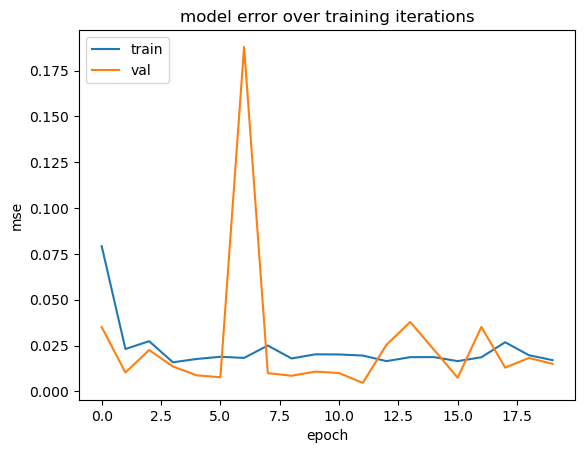

In [14]:
#Look at training error graph
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model error over training iterations')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
#Predict the output for the test dataset.
pred_res = ann_model.predict(test_x)

1/1 [==============================] - 0s 238ms/step


In [34]:
#Save the predicted data into 
norm_output=np.concatenate((test_x,pred_res),axis=1)
denorm_output=norm_data.inverse_transform(norm_output)
np.savetxt('Denormalized_output.csv',denorm_output,delimiter=',')

In [ ]:
#Optional- Execute this to save all other processed data as files
np.savetxt('train_x.csv',train_x,delimiter=',')
np.savetxt('train_y.csv',train_y,delimiter=',')
np.savetxt('test_x.csv',test_x,delimiter=',')
np.savetxt('test_y.csv',test_y,delimiter=',')
np.savetxt('Normalized_train_data.csv',tr_data,delimiter=',')
np.savetxt('Normalized_test_data.csv',tst_data,delimiter=',')